# Customer Churn Analysis

- Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

- Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

- I will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from scipy.stats import zscore
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import power_transform
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import OrdinalEncoder
import joblib
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('customer_churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
df.shape   #checking te data dimensiion

(7043, 21)

In [6]:
df.columns   #checking the columns of the dataset

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
df.dtypes   #checking the data types of each column

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
#checking the null values in the dataset
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

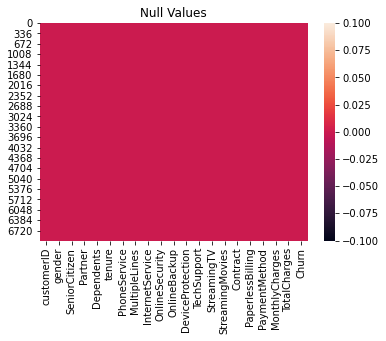

In [9]:
#checking the null values in dataset by using heatmap
sns.heatmap(df.isnull())
plt.title('Null Values')
plt.show()

- From the above 2 observations we can observe that their is no null values in the dataset.

### Visualization of the Data

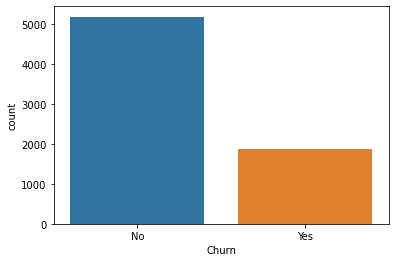

In [10]:
sns.countplot(x='Churn',data=df)
plt.show()

In [11]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

- We can observe that majority of the customers are not churn by the company.

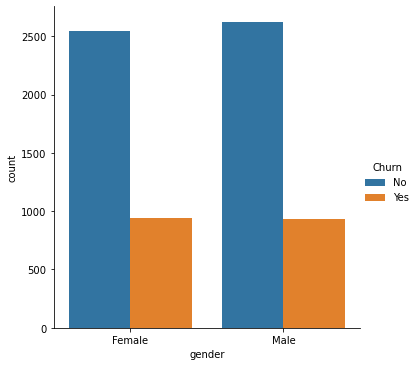

In [12]:
sns.catplot(x ="gender", hue ="Churn",  kind ="count", data = df) 

- from the above graph we can observe that in both the gender category majority of the people are not churned by the company.

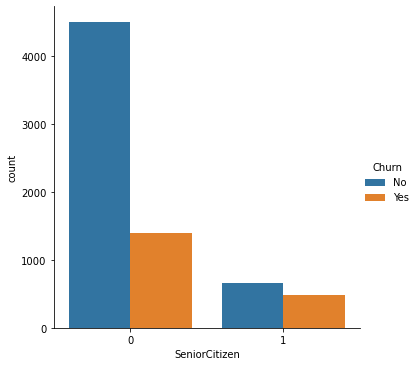

In [13]:
sns.catplot(x ="SeniorCitizen", hue ="Churn",  kind ="count", data = df) 

- We can observve that when the customer are not senior citizen then majority of customers are not churned.

- when the customer is senior citizen then the ratio of  churn and not churn customers is very less.

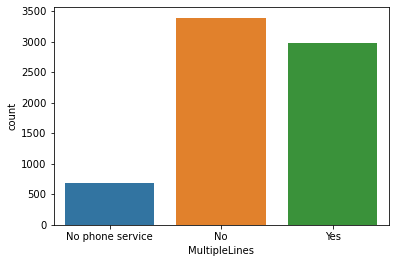

In [14]:
sns.countplot(x='MultipleLines',data=df)
plt.show()

- we can observe that their are very less people with 'No phone Service'.

- Majority of the people have no multiple lines but the ratio of people who have multiple lines and who don't have multiple lines are very less.

<AxesSubplot:xlabel='gender', ylabel='tenure'>

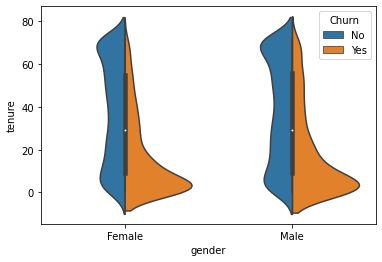

In [15]:
sns.violinplot(x ="gender", y ="tenure", hue ="Churn",  data = df, split = True) 

- From above figure, we can observe that when cx takes less tenure package then more customers are churned but when the customer takes more tenured package, then more number of people are not churned.

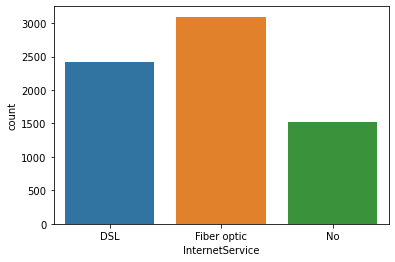

In [16]:
sns.countplot(x='InternetService',data=df)
plt.show()

- From the above graph we can observe that majority of the people have opted for 'fibre optics'.

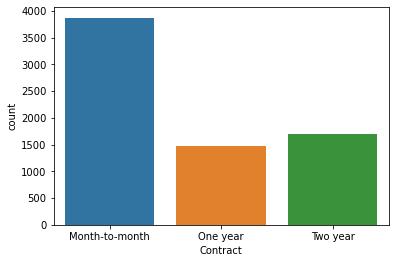

In [17]:
sns.countplot(x='Contract',data=df)
plt.show()

- We can observe that majority of the people have taken month-to-month contract.

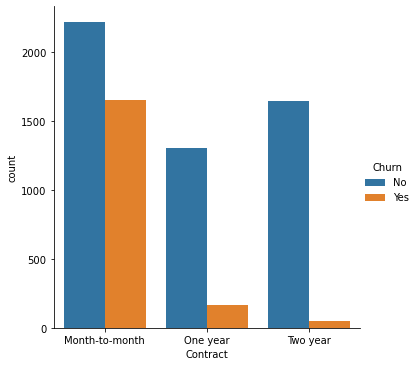

In [18]:
sns.catplot(x ="Contract", hue ="Churn",  kind ="count", data = df)

- From the above graph we can observe that in one-year and two-year category the ratio of churned and not churned people is very high but in month-to-month basis the ratio is less.

- In every category of contract the number of people who are not churned is high.

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

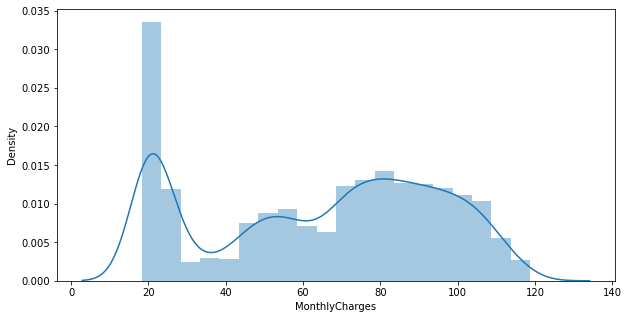

In [19]:
plt.figure(figsize=(10, 5))
sns.distplot(df['MonthlyCharges'], bins=20)

- From the above graph we can observe that majority have taken the plan that has monthly charges in range from 18-25.

In [20]:
#Changing thhe datatypes of te object column
enc=OrdinalEncoder()

for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

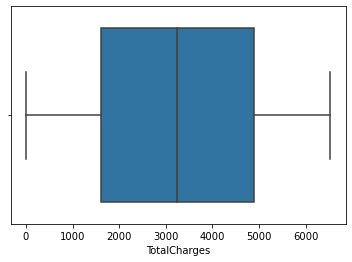

In [21]:
sns.boxplot(x= "TotalCharges", data=df)
plt.show()

- From the above figure we can observe that the range of total charges are from 0-6700.

- the majority of the people arehaving total charges between range of 1500-5000.

array([[<AxesSubplot:title={'center':'customerID'}>,
        <AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'SeniorCitizen'}>,
        <AxesSubplot:title={'center':'Partner'}>,
        <AxesSubplot:title={'center':'Dependents'}>,
        <AxesSubplot:title={'center':'tenure'}>,
        <AxesSubplot:title={'center':'PhoneService'}>],
       [<AxesSubplot:title={'center':'MultipleLines'}>,
        <AxesSubplot:title={'center':'InternetService'}>,
        <AxesSubplot:title={'center':'OnlineSecurity'}>,
        <AxesSubplot:title={'center':'OnlineBackup'}>,
        <AxesSubplot:title={'center':'DeviceProtection'}>,
        <AxesSubplot:title={'center':'TechSupport'}>,
        <AxesSubplot:title={'center':'StreamingTV'}>],
       [<AxesSubplot:title={'center':'StreamingMovies'}>,
        <AxesSubplot:title={'center':'Contract'}>,
        <AxesSubplot:title={'center':'PaperlessBilling'}>,
        <AxesSubplot:title={'center':'PaymentMethod'}>,
        <AxesSub

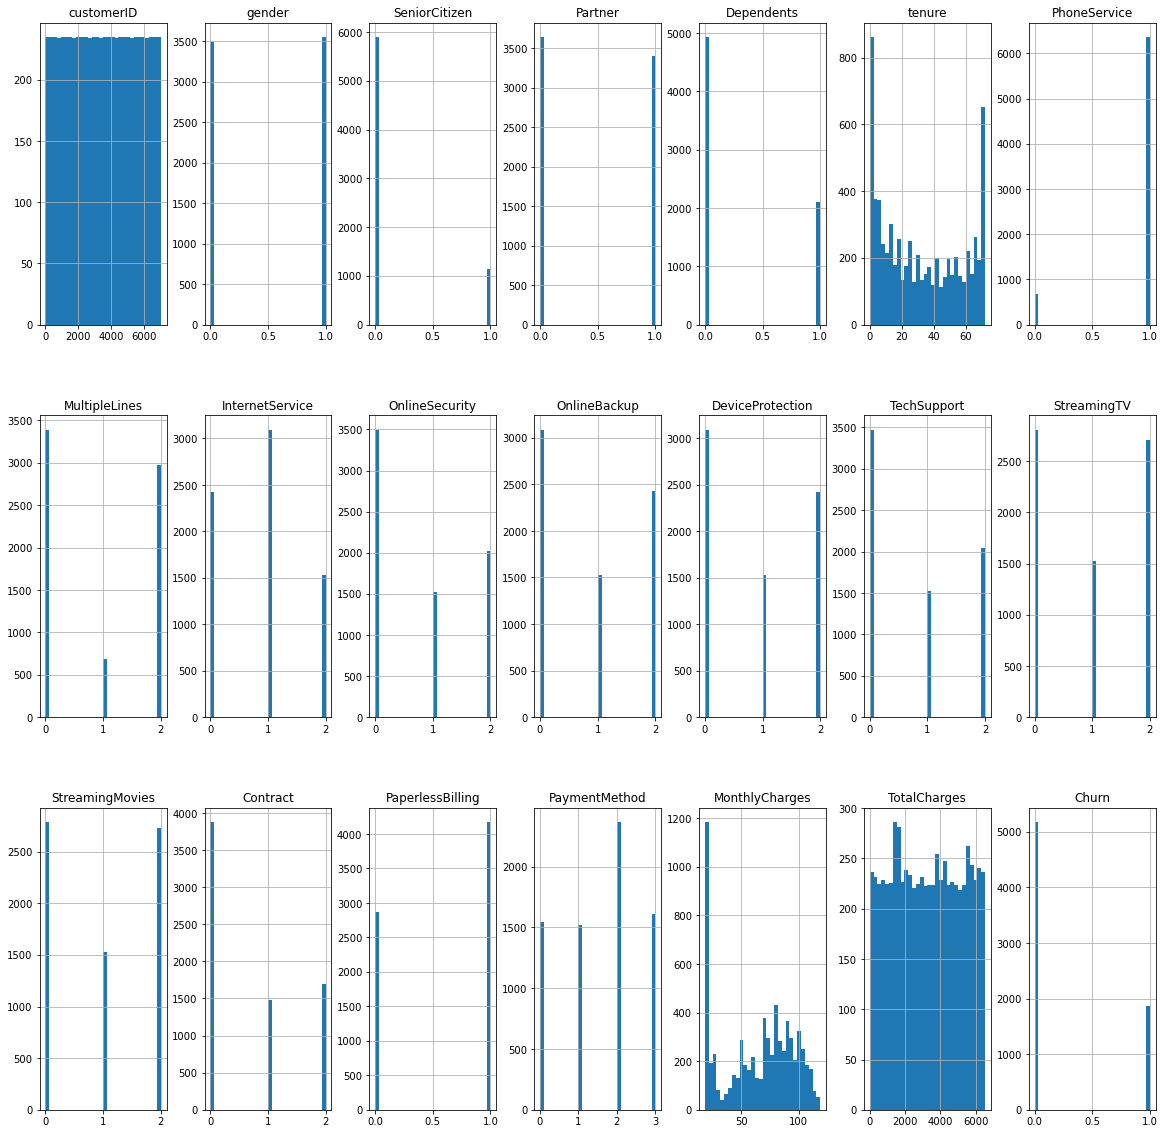

In [22]:
# 'Histogram to see the data distribution of all the columns'
df.hist(figsize=(20,20), grid = True, layout = (3,7), bins = 30)

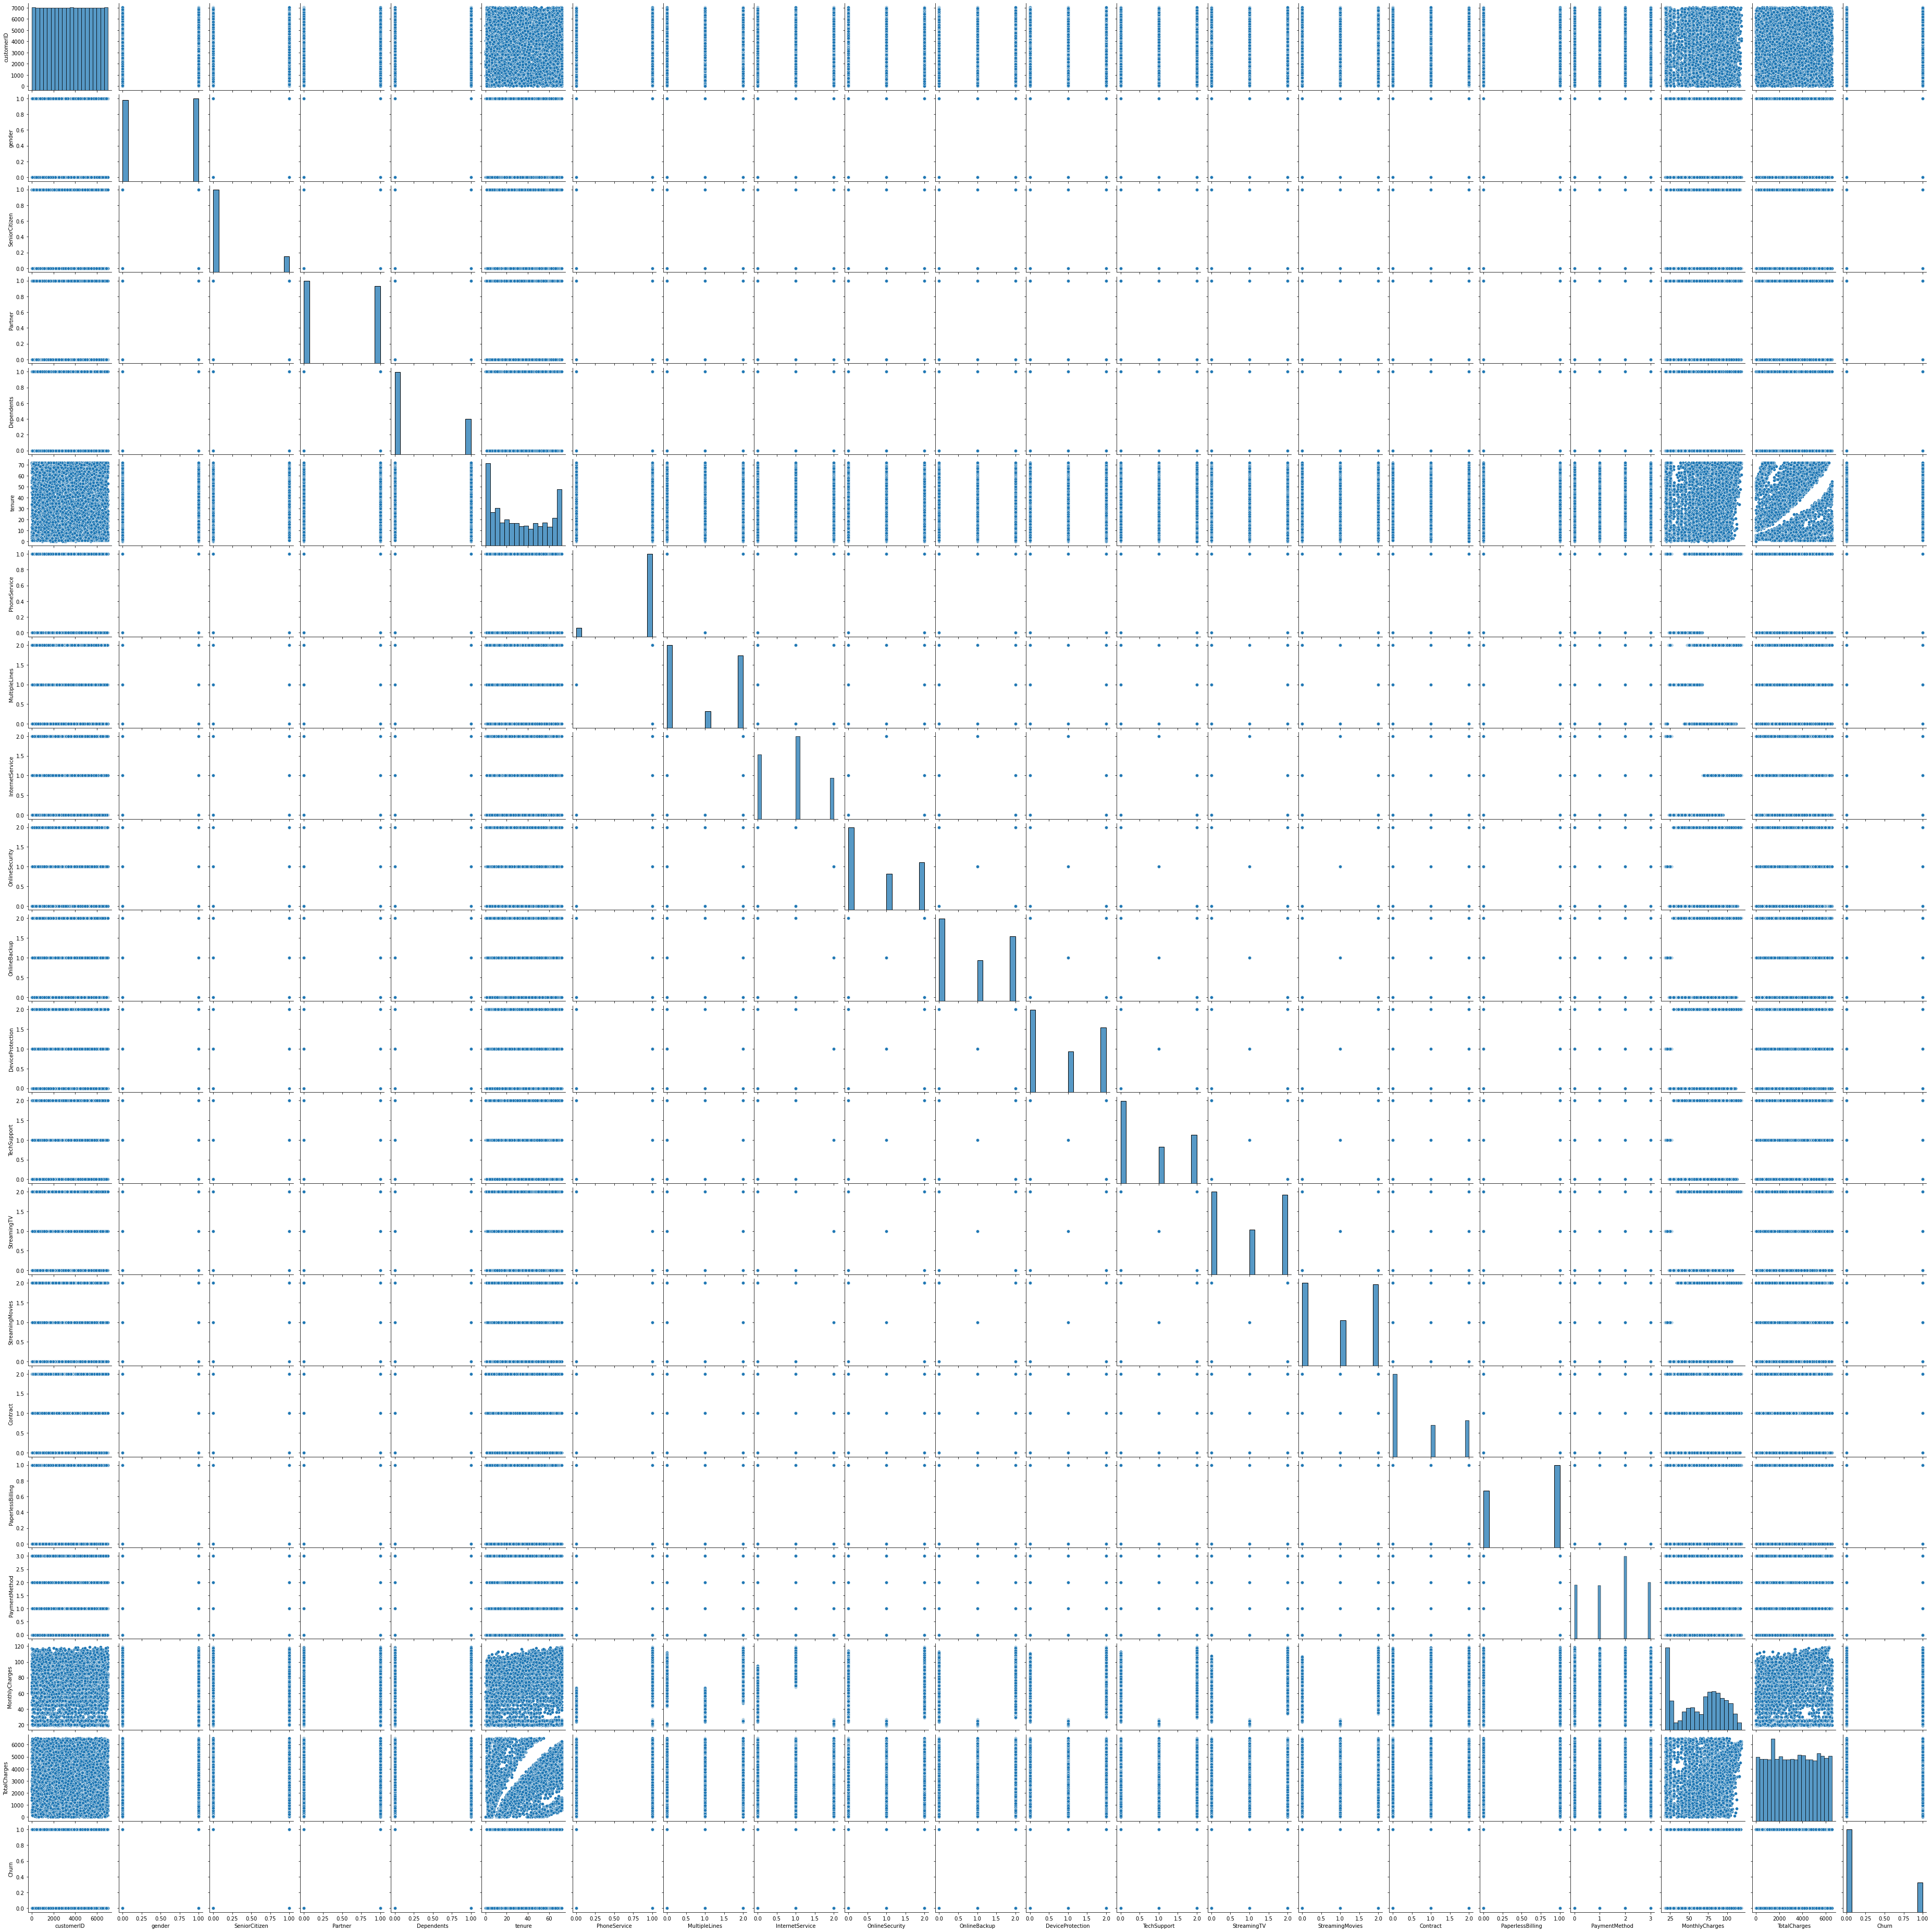

In [23]:
sns.pairplot(df)

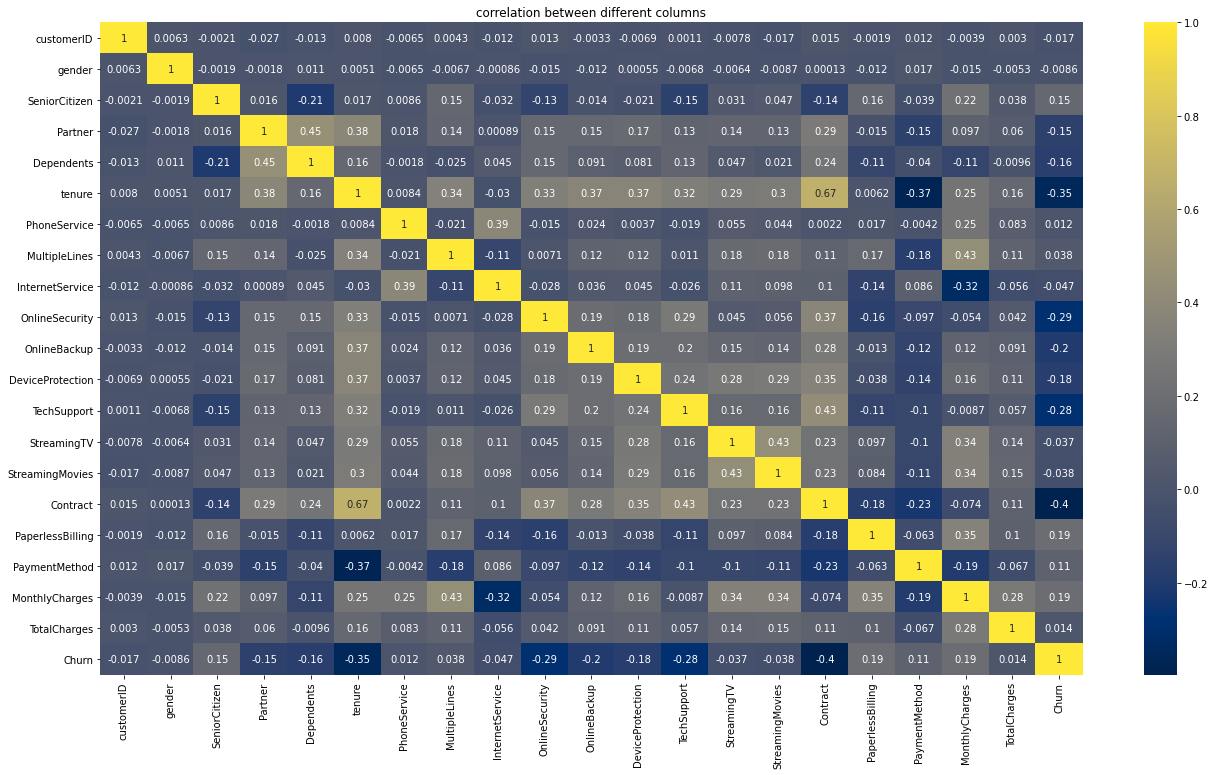

In [24]:
corr_df= df.corr()

plt.figure(figsize=[22,12])
sns.heatmap(corr_df,cmap="cividis",annot=True)
plt.title('correlation between different columns')
plt.show()

In [25]:
#defining corr between every column to the target column

corr_matrix=df.corr()
corr_matrix['Churn'].sort_values(ascending=False)

Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.038037
TotalCharges        0.014479
PhoneService        0.011942
gender             -0.008612
customerID         -0.017447
StreamingTV        -0.036581
StreamingMovies    -0.038492
InternetService    -0.047291
Partner            -0.150448
Dependents         -0.164221
DeviceProtection   -0.178134
OnlineBackup       -0.195525
TechSupport        -0.282492
OnlineSecurity     -0.289309
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64

- From above 2 observations we can see that 'Monthly chrages' is most positive highly correlated column and 'contract' is themost negative highly correlated column with the churn column.

- We can also see that gender is the least correlated column with the churn column.

In [26]:
df.describe()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,3521.000000,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,3257.794122,0.265370
std,2033.283305,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,1888.693496,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000
25%,1760.500000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,1609.000000,0.000000
50%,3521.000000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,3249.000000,0.000000
75%,5281.500000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,4901.500000,1.000000
max,7042.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,6530.000000,1.000000


- As we can see that only 'Monthly charges','Tenure' and 'Toatal charges' are having continous data.

- We can observe that Standard deviation is very high in 'TotalCharges'. 

In [27]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375.0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,2505.0,0.0
1,3962.0,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1466.0,0.0
2,2564.0,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,157.0,1.0
3,5535.0,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1400.0,0.0
4,6511.0,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,925.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853.0,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,1597.0,0.0
7039,1525.0,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,5698.0,0.0
7040,3367.0,0.0,0,1.0,1.0,11,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,2994.0,0.0
7041,5934.0,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,2660.0,1.0


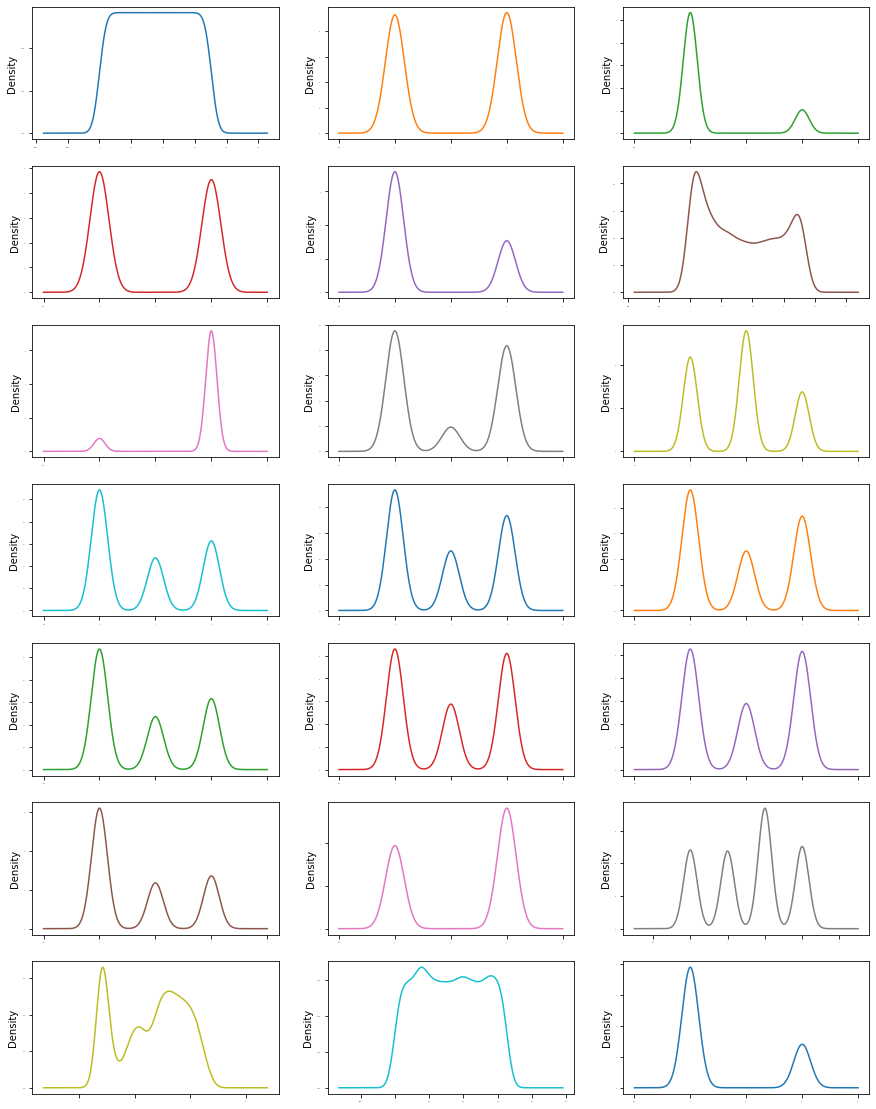

In [28]:
df.plot(kind='density',subplots=True,  layout=(7,3), sharex=False, legend=False, fontsize=1, figsize=(15,20))
plt.show()

In [29]:
df=df.drop('customerID', axis=1)

- We can drop customer id as it will not help us to predict whether the customer is churn or not.

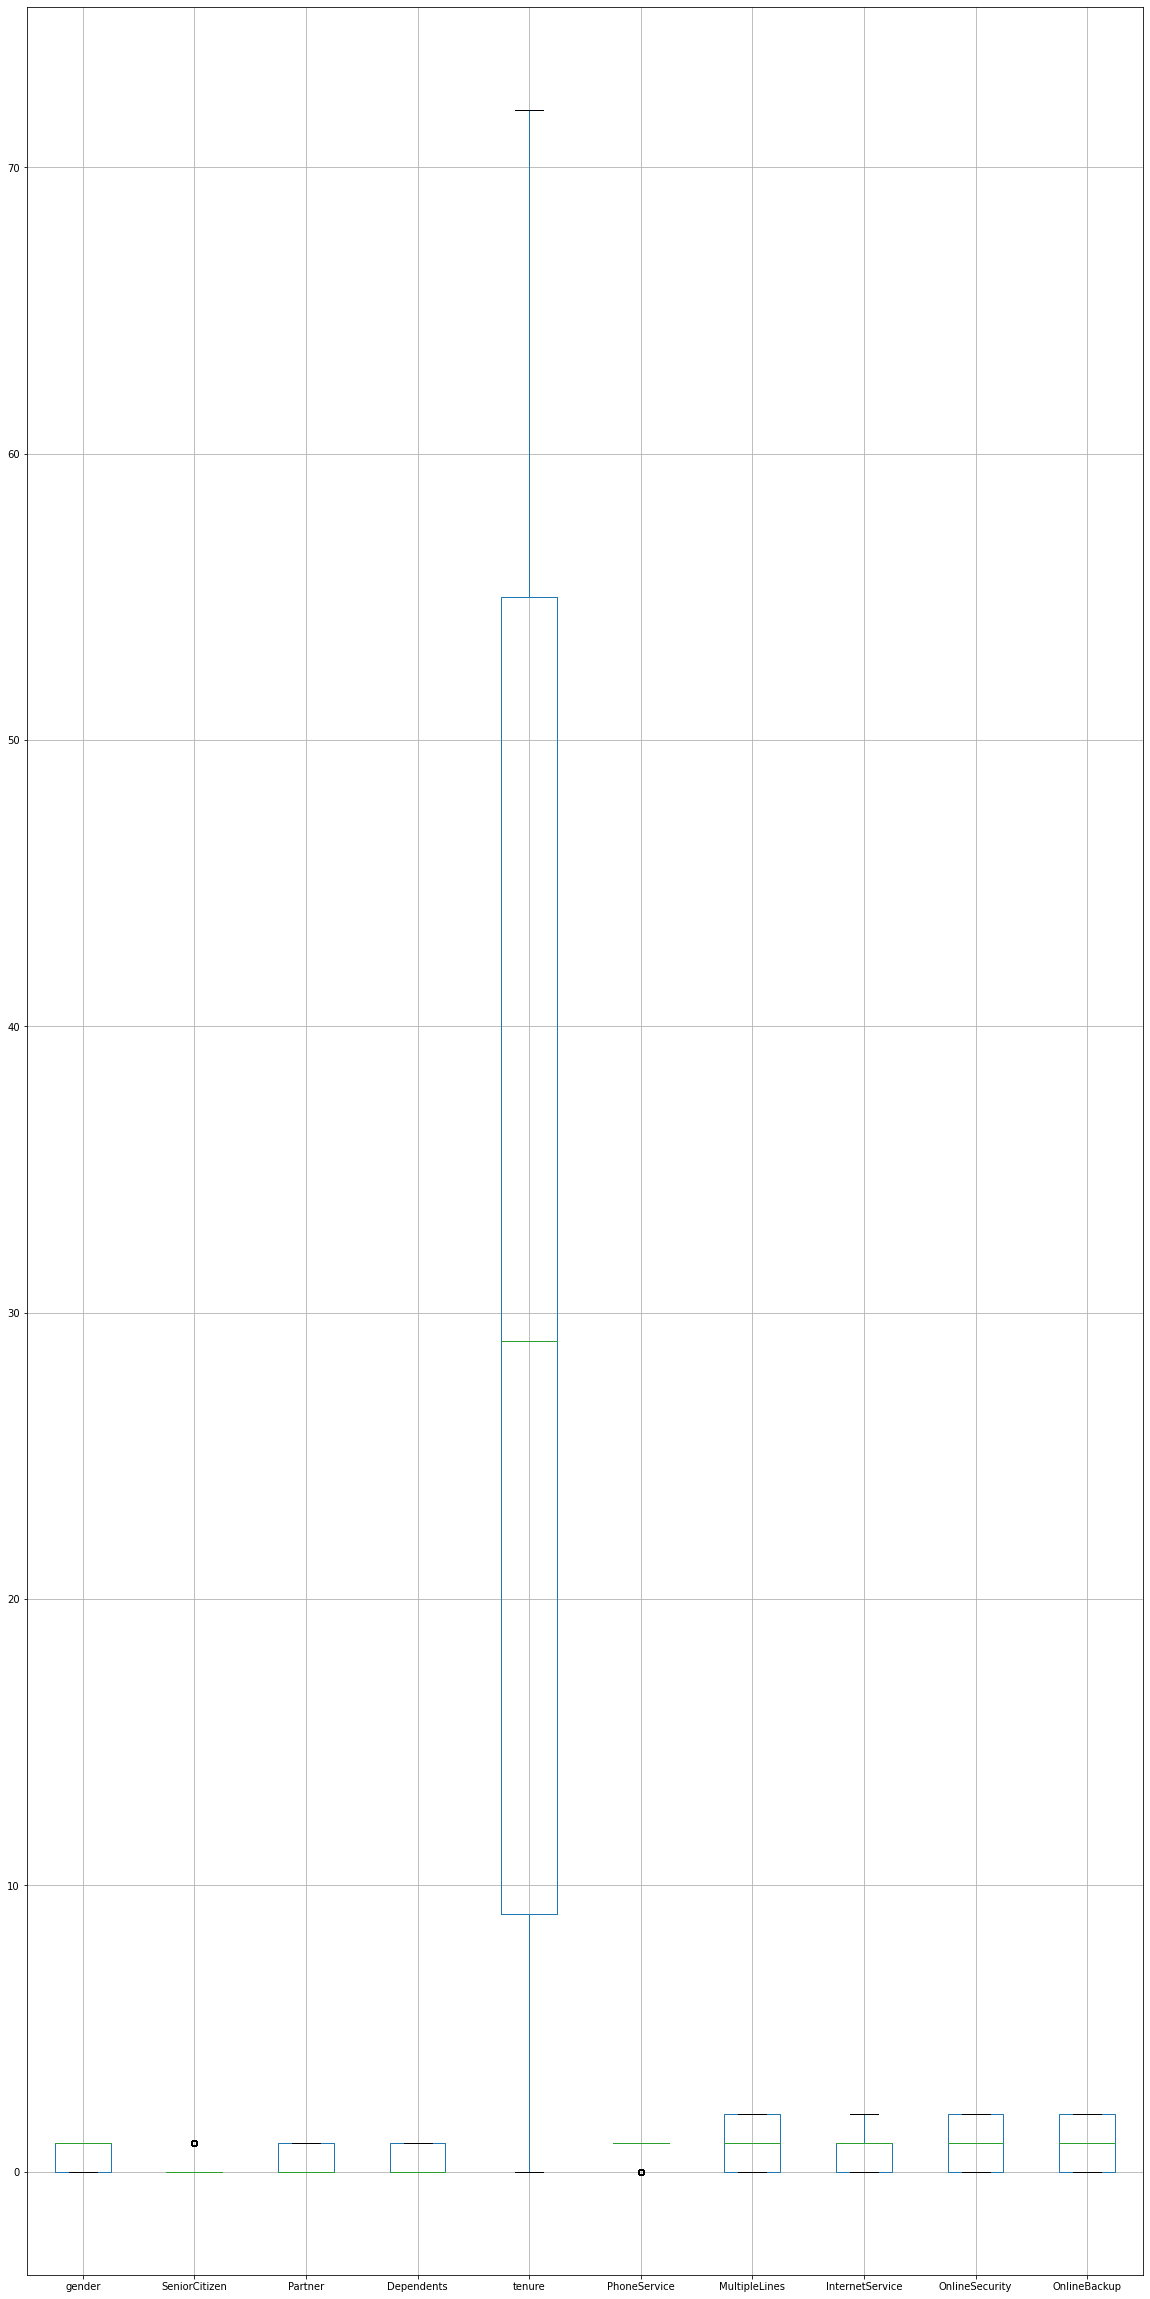

In [30]:
#checking the outliers
df.iloc[:,0:10].boxplot(figsize=[20,50])
plt.subplots_adjust(bottom=0.25)
plt.show()

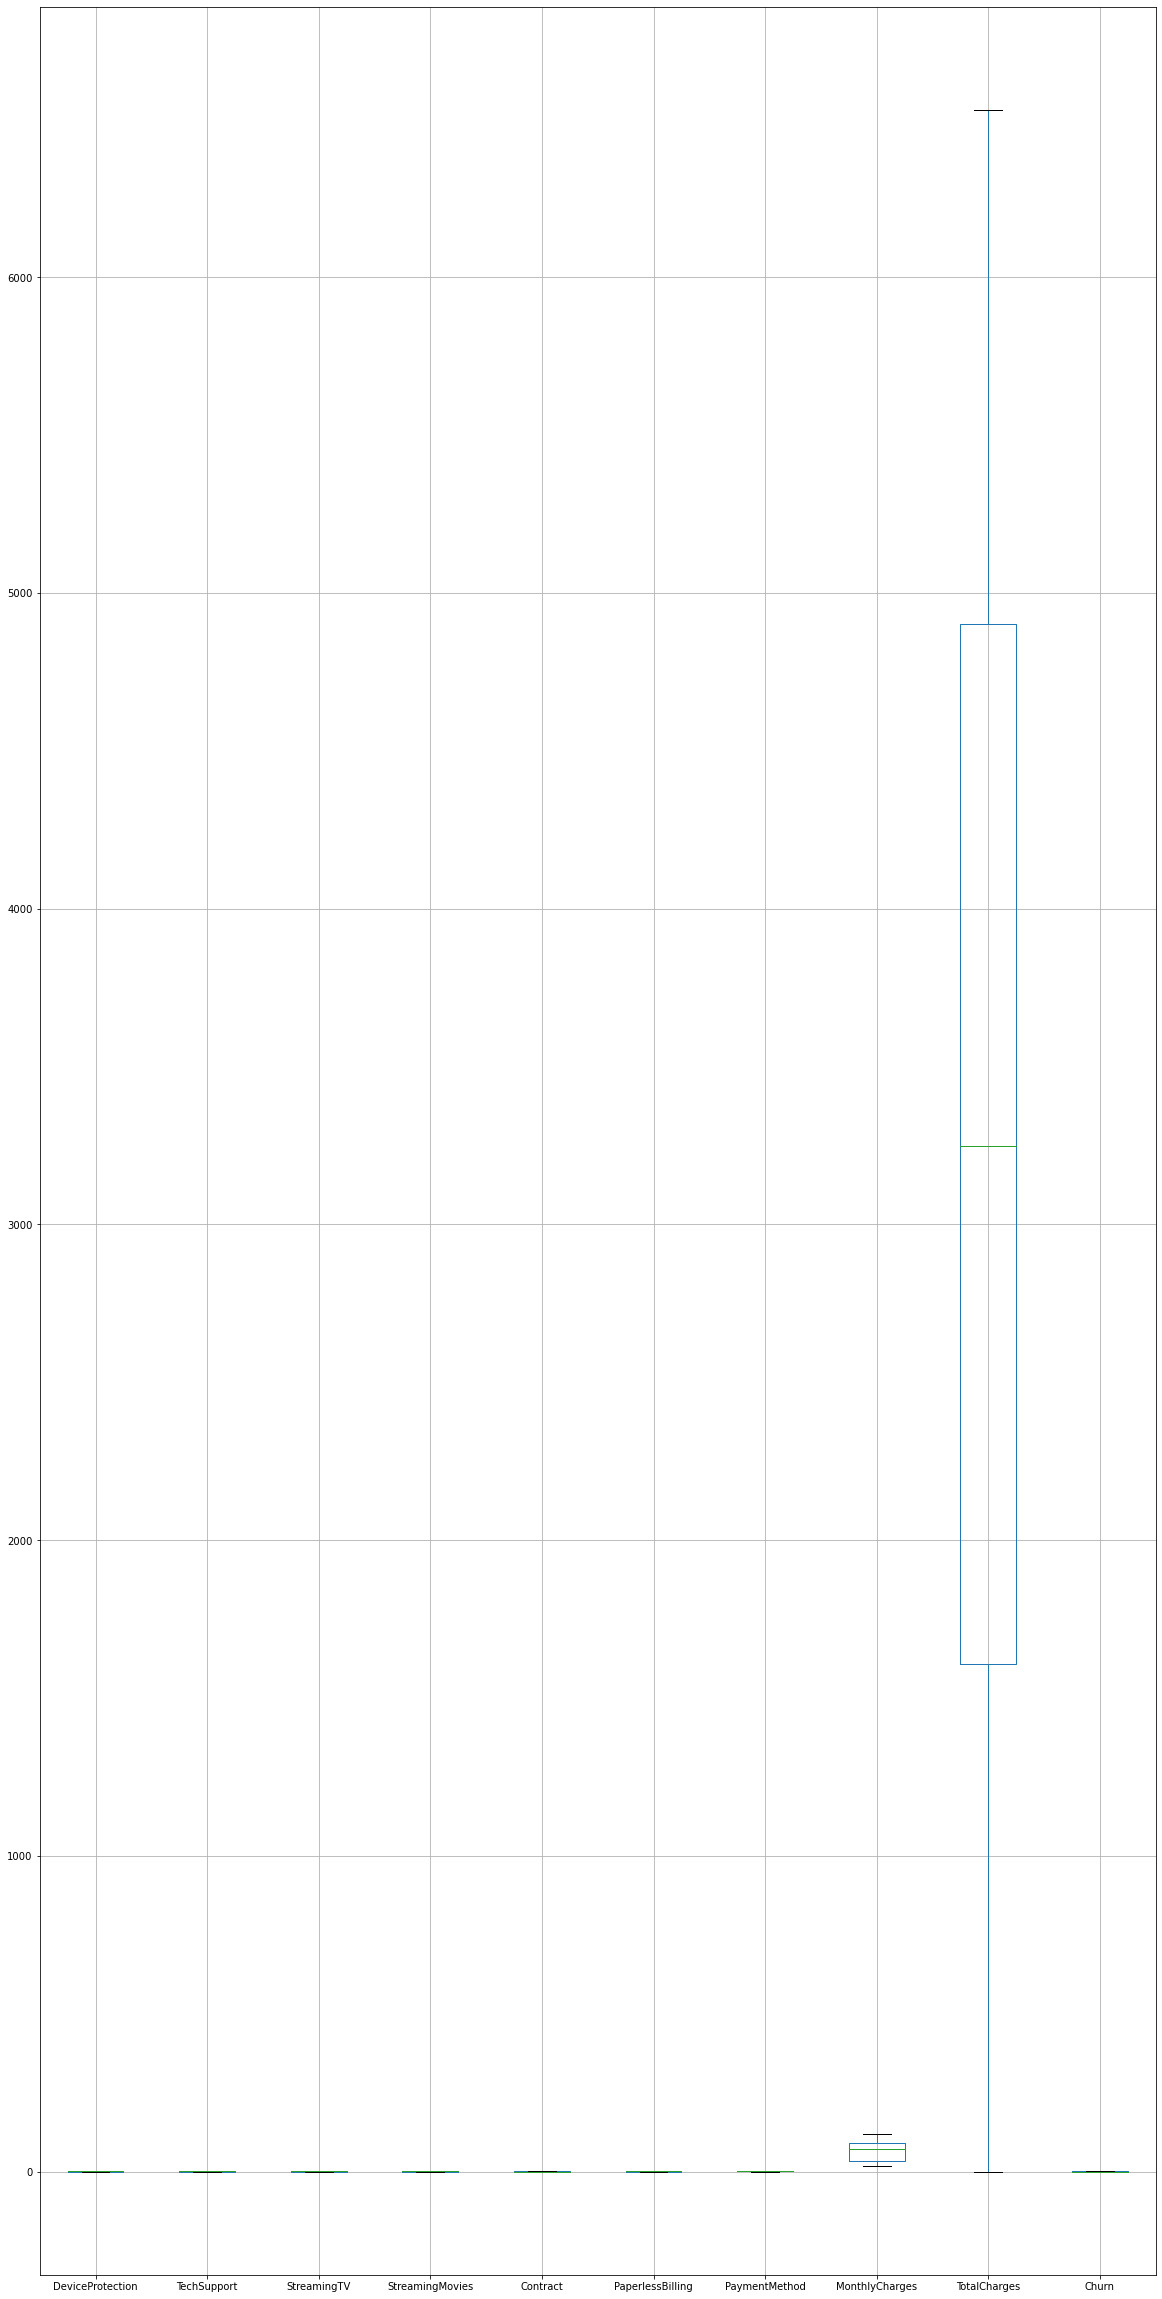

In [31]:
#checking the outliers
df.iloc[:,10:22].boxplot(figsize=[20,50])
plt.subplots_adjust(bottom=0.25)
plt.show()

- From the above 2 plots wecan observe that their is no considerable outliers present in the dataset.

In [32]:
#checking the skewness in the data
df.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.015857
Churn               1.063031
dtype: float64

- We can observe that their are only 3 column which have continous data that are 'Tenure','Monthlycharges','Totalcharges' and their is no skewness present in these columns.

### Model Building

In [33]:
#splitting the dataset into independent and target variables in x and y respectively

x=df.drop('Churn', axis=1)
y=df['Churn']

In [34]:
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,2505.0
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1466.0
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,157.0
3,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1400.0
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,925.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,1597.0
7039,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,5698.0
7040,0.0,0,1.0,1.0,11,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,2994.0
7041,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,2660.0


In [35]:
y

0       0.0
1       0.0
2       1.0
3       0.0
4       1.0
       ... 
7038    0.0
7039    0.0
7040    0.0
7041    1.0
7042    0.0
Name: Churn, Length: 7043, dtype: float64

In [36]:
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At random state {i}, the training accuracy is:- {accuracy_score(y_train,pred_train)}")
    print(f"At random state {i}, the testing accuracy is:- {accuracy_score(y_test,pred_test)}")
    print("\n")

At random state 0, the training accuracy is:- 0.8024494142705005
At random state 0, the testing accuracy is:- 0.7849538679914834


At random state 1, the training accuracy is:- 0.7981895633652822
At random state 1, the testing accuracy is:- 0.8026969481902059


At random state 2, the training accuracy is:- 0.7992545260915868
At random state 2, the testing accuracy is:- 0.8055358410220014


At random state 3, the training accuracy is:- 0.7983670571529996
At random state 3, the testing accuracy is:- 0.8140525195173882


At random state 4, the training accuracy is:- 0.7996095136670217
At random state 4, the testing accuracy is:- 0.7750177430801988


At random state 5, the training accuracy is:- 0.8004969826056088
At random state 5, the testing accuracy is:- 0.794889992902768


At random state 6, the training accuracy is:- 0.7941072062477813
At random state 6, the testing accuracy is:- 0.8005677785663591


At random state 7, the training accuracy is:- 0.7992545260915868
At random state 7, 

At random state 62, the training accuracy is:- 0.7971246006389776
At random state 62, the testing accuracy is:- 0.8041163946061036


At random state 63, the training accuracy is:- 0.8044018459353922
At random state 63, the testing accuracy is:- 0.7842441447835344


At random state 64, the training accuracy is:- 0.7941072062477813
At random state 64, the testing accuracy is:- 0.7970191625266146


At random state 65, the training accuracy is:- 0.8019169329073482
At random state 65, the testing accuracy is:- 0.794180269694819


At random state 66, the training accuracy is:- 0.7967696130635428
At random state 66, the testing accuracy is:- 0.7842441447835344


At random state 67, the training accuracy is:- 0.7953496627618033
At random state 67, the testing accuracy is:- 0.7955997161107168


At random state 68, the training accuracy is:- 0.7944621938232161
At random state 68, the testing accuracy is:- 0.8076650106458482


At random state 69, the training accuracy is:- 0.7957046503372383
At r

At random state 124, the training accuracy is:- 0.7960596379126731
At random state 124, the testing accuracy is:- 0.8126330731014905


At random state 125, the training accuracy is:- 0.8020944266950657
At random state 125, the testing accuracy is:- 0.8034066713981547


At random state 126, the training accuracy is:- 0.7946396876109336
At random state 126, the testing accuracy is:- 0.794889992902768


At random state 127, the training accuracy is:- 0.7951721689740859
At random state 127, the testing accuracy is:- 0.7963094393186657


At random state 128, the training accuracy is:- 0.7971246006389776
At random state 128, the testing accuracy is:- 0.7955997161107168


At random state 129, the training accuracy is:- 0.7903798367057153
At random state 129, the testing accuracy is:- 0.8126330731014905


At random state 130, the training accuracy is:- 0.8083067092651757
At random state 130, the testing accuracy is:- 0.7906316536550745


At random state 131, the training accuracy is:- 0.802804

At random state 185, the training accuracy is:- 0.8044018459353922
At random state 185, the testing accuracy is:- 0.7828246983676366


At random state 186, the training accuracy is:- 0.8029818956336529
At random state 186, the testing accuracy is:- 0.794180269694819


At random state 187, the training accuracy is:- 0.802626908058218
At random state 187, the testing accuracy is:- 0.7970191625266146


At random state 188, the training accuracy is:- 0.8042243521476748
At random state 188, the testing accuracy is:- 0.78708303761533


At random state 189, the training accuracy is:- 0.80386936457224
At random state 189, the testing accuracy is:- 0.7806955287437899


At random state 190, the training accuracy is:- 0.8019169329073482
At random state 190, the testing accuracy is:- 0.794889992902768


At random state 191, the training accuracy is:- 0.8003194888178914
At random state 191, the testing accuracy is:- 0.8034066713981547


At random state 192, the training accuracy is:- 0.794462193823

- From the above stats, at random state 18 the testing accuracy and training accuracy is hightest.

- Testing the best Random State in different algorithms

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=18)

In [41]:
model=[LogisticRegression(),SVC(),RandomForestClassifier(),AdaBoostClassifier(),DecisionTreeClassifier()]

In [42]:
for n in model:
    n.fit(x_train,y_train)
    n.score(x_train,y_train)
    predm=n.predict(x_test)
    print('accuracy score of',n,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

accuracy score of LogisticRegression() is:
0.8261178140525195
[[949 109]
 [136 215]]
              precision    recall  f1-score   support

         0.0       0.87      0.90      0.89      1058
         1.0       0.66      0.61      0.64       351

    accuracy                           0.83      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.82      0.83      0.82      1409



accuracy score of SVC() is:
0.7508871540099361
[[1058    0]
 [ 351    0]]
              precision    recall  f1-score   support

         0.0       0.75      1.00      0.86      1058
         1.0       0.00      0.00      0.00       351

    accuracy                           0.75      1409
   macro avg       0.38      0.50      0.43      1409
weighted avg       0.56      0.75      0.64      1409



accuracy score of RandomForestClassifier() is:
0.8062455642299503
[[952 106]
 [167 184]]
              precision    recall  f1-score   support

         0.0       0.85      0.90      

- Now checking cross validation score to check whether our models are overfitted or underfitted.

In [43]:
scrlr=cross_val_score(LogisticRegression(),x,y, cv=5)
print('cross validation score of logisticregression: ',scrlr.mean())

cross validation score of logisticregression:  0.7993763710561972


In [44]:
scrrf=cross_val_score(RandomForestClassifier(),x,y, cv=5)
print('cross validation score of randomforestclassifier: ',scrrf.mean())

cross validation score of randomforestclassifier:  0.7885858563455707


In [45]:
scrdtc=cross_val_score(DecisionTreeClassifier(),x,y, cv=5)
print('cross validation score of decisiontree classifier: ',scrdtc.mean())

cross validation score of decisiontree classifier:  0.7222753282469837


In [46]:
scrsvc=cross_val_score(SVC(),x,y, cv=5)
print('cross validation score of SVC: ',scrsvc.mean())

cross validation score of SVC:  0.7346301575908123


In [47]:
scrada=cross_val_score(AdaBoostClassifier(),x,y, cv=5)
print('cross validation score of AdaBoostClassifier: ',scrada.mean())

cross validation score of AdaBoostClassifier:  0.802499253984128


- As we can see the Minimum difference in accuracy score and cross validation score is for DecisionTreeClassifier, AdaBoostClassifier, SVC and RandomforestClassifier (2) so they are our best model.

- We are using AdaBoostClassifier

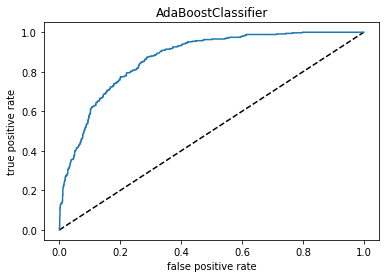

In [56]:
ada=AdaBoostClassifier()
ada.fit(x_train,y_train)
pred=ada.predict(x_test)
y_pred_prob=ada.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='AdaBoostCassifier')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('AdaBoostClassifier')
plt.show()

- From the above graph we can see that the Adaboostclassifier is performing well in this dataset.

- Doing GridSearchCV for getting best parameters for AdaBoostClassifier()

In [48]:
#creating parameter list to pass in GridSearchCV
parameters= {'n_estimators': np.arange(10,60,5),
             'algorithm': ['SAMME', 'SAMME.R'],
             'learning_rate': np.arange(0,10),}

In [49]:
GCV=GridSearchCV(AdaBoostClassifier(),parameters,cv=5)

In [50]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'n_estimators': array([10, 15, 20, 25, 30, 35, 40, 45, 50, 55])})

In [52]:
#getting the best parameters found by GridSearchCV
GCV.best_params_

{'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 30}

In [53]:
GCV_pred=GCV.best_estimator_.predict(x_test)

In [54]:
accuracy_score(GCV_pred,y_test)

0.8275372604684174

In [57]:
joblib.dump(GCV.best_estimator_,'Customer_Churn.obj')

['Customer_Churn.obj']

> Case Study:

- Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

- Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

- I will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models.


> Findings:

- majority of the customers are not churn by the company.
- when the customer are not senior citizen then majority of customers are not churned. when the customer is senior citizen then the ratio of churn and not churn customers is very less.
- In both the gender category majority of the people are not churned by the company.
- their are very less people with 'No phone Service'. Majority of the people have no multiple lines but the ratio of people who have multiple lines and who don't have multiple lines are very less.
- when cx takes less tenure package then more customers are churned but when the customer takes more tenured package, then more number of people are not churned.
- majority of the people have opted for 'fibre optics'.
- majority of the people have taken month-to-month contract.
-  in one-year and two-year category the ratio of churned and not churned people is very high but in month-to-month basis the ratio is less.
- In every category of contract the number of people who are not churned is high.
- majority have taken the plan that has monthly charges in range from 18-25.
- the range of total charges are from 0-6700. the majority of the people arehaving total charges between range of 1500-5000.
-  'Monthly chrages' is most positive highly correlated column and 'contract' is themost negative highly correlated column with the churn column. We can also see that gender is the least correlated column with the churn column.


> Predictions:

- At random state 18 the testing accuracy and training accuracy is hightest.
- The best accuracy_score is for AdaBoostClassifier.
- the Minimum difference in accuracy score and cross validation score is for DecisionTreeClassifier, AdaBoostClassifier, SVC and RandomforestClassifier (2) so they are our best model.
- We are using AdaBoostClassifier.
- After doing hyperparameter tuning. we increase the score of our model from 80% to 83%.